# Data Analysis and Visualization
## Ford GoBike System Data
#### by: Raffael Schlender

## Introduction
In this project, I investigated trip data of users in San Francisco Bay Area. The main focus was to wrangle and explore a `201902-fordgobike-tripdata` datafile by using Python visualization libraries, starting from plots of single variables and building up to plots of multiple variables. Now, I present the interesting relationships, patterns and insights that I discovered in the selected and cleaned dataset.

## Data
The Dataset consists of information regarding 183.412 bike trips, including its timing and geolocation of the start and end of each trip.
The following features were primarily used in the investigation:

> - Bike Time Duration (minutes)
> - Start Time (hour of day) and Date (day of week)
> - User Type (Subscriber = Member or Customer = Casual)
> - Member Gender
> - Member Age

#### Data Cleaning

The most important data cleaning steps included:

> - Convert / correct data types
> - Remove data where bike time duration > 60 minutes
> - Create new variables like day of week, hour of day or member age
> - Delete illogical data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# read the csv file, and check its top 10 rows
df = pd.read_csv(r"C:\Users\D441118\Desktop\Udacity\Project7_Visualization\clean_master_file.csv")
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,duration_min,start_time_dayofweek,start_time_hourofday,member_age
0,271,2019-02-01 00:00:20.636,2019-02-01 00:04:52.058,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989,Male,4.516667,Fri,0,30
1,676,2019-02-11 00:07:58.026,2019-02-11 00:19:14.882,339.0,Jackson St at 11th St,37.800002,-122.266438,46.0,San Antonio Park,37.790140,-122.242373,4989,Subscriber,1982,Male,11.266667,Mon,0,37
2,944,2019-02-11 00:05:12.592,2019-02-11 00:20:57.010,321.0,5th St at Folsom,37.780146,-122.403071,134.0,Valencia St at 24th St,37.752428,-122.420628,5045,Subscriber,1988,Male,15.733333,Mon,0,31
3,418,2019-02-11 00:14:44.694,2019-02-11 00:21:42.945,249.0,Russell St at College Ave,37.858473,-122.253253,274.0,Oregon St at Adeline St,37.857567,-122.267558,5076,Customer,2000,Other,6.966667,Mon,0,19
4,1095,2019-02-11 00:07:41.756,2019-02-11 00:25:57.130,259.0,Addison St at Fourth St,37.866249,-122.299371,273.0,Fulton St at Ashby Ave,37.855574,-122.263565,5119,Subscriber,1994,Female,18.250000,Mon,0,25
5,498,2019-02-11 00:17:53.822,2019-02-11 00:26:12.391,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,3349,Customer,1992,Male,8.300000,Mon,0,27
6,746,2019-02-11 00:17:14.541,2019-02-11 00:29:41.220,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,254.0,Vine St at Shattuck Ave,37.880222,-122.269592,4869,Subscriber,1995,Male,12.433333,Mon,0,24
7,145,2019-02-11 00:14:12.644,2019-02-11 00:16:38.491,166.0,College Ave at Alcatraz Ave,37.851376,-122.252523,18.0,Telegraph Ave at Alcatraz Ave,37.850222,-122.260172,5391,Subscriber,1989,Male,2.416667,Mon,0,30
8,189,2019-02-11 00:29:25.023,2019-02-11 00:32:34.148,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,5537,Subscriber,1973,Male,3.150000,Mon,0,46
9,423,2019-02-11 00:32:39.960,2019-02-11 00:39:43.336,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,1809,Subscriber,1982,Female,7.050000,Mon,0,37


In [3]:
# check info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170062 entries, 0 to 170061
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             170062 non-null  int64  
 1   start_time               170062 non-null  object 
 2   end_time                 170062 non-null  object 
 3   start_station_id         170062 non-null  float64
 4   start_station_name       170062 non-null  object 
 5   start_station_latitude   170062 non-null  float64
 6   start_station_longitude  170062 non-null  float64
 7   end_station_id           170062 non-null  float64
 8   end_station_name         170062 non-null  object 
 9   end_station_latitude     170062 non-null  float64
 10  end_station_longitude    170062 non-null  float64
 11  bike_id                  170062 non-null  int64  
 12  user_type                170062 non-null  object 
 13  member_birth_year        170062 non-null  int64  
 14  memb

In [4]:
# convert start_time_dayofweek to ordinal variables
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered=True, categories=weekdays)
df['start_time_dayofweek'] = df['start_time_dayofweek'].astype(ordered_weekdays)

# check info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170062 entries, 0 to 170061
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             170062 non-null  int64   
 1   start_time               170062 non-null  object  
 2   end_time                 170062 non-null  object  
 3   start_station_id         170062 non-null  float64 
 4   start_station_name       170062 non-null  object  
 5   start_station_latitude   170062 non-null  float64 
 6   start_station_longitude  170062 non-null  float64 
 7   end_station_id           170062 non-null  float64 
 8   end_station_name         170062 non-null  object  
 9   end_station_latitude     170062 non-null  float64 
 10  end_station_longitude    170062 non-null  float64 
 11  bike_id                  170062 non-null  int64   
 12  user_type                170062 non-null  object  
 13  member_birth_year        170062 non-null  in

# Key Findings
## 1. Bike Time Duration
#### Observations

The distribution of biking durations is skewed. The range of data points are between 1 minute to 1400+ minutes. The average is around 12 minutes and the median at around 9 minutes. To make data visualization and interpretation easiler, outliers were removed. Below are the plots without and with a log scale.

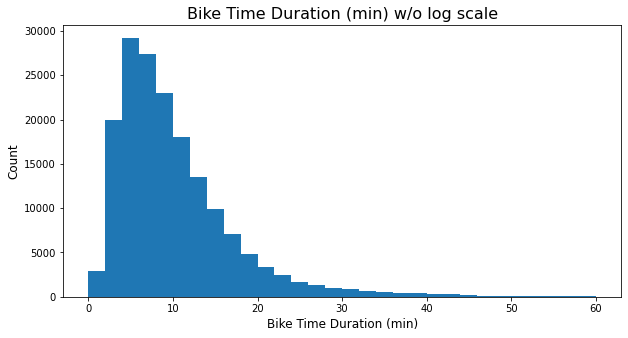

In [5]:
# plot bike time duration in minutes
binsize = 2
bins = np.arange(0, df['duration_min'].max()+binsize, binsize)
plt.rcParams["figure.figsize"] = (10,5)
plt.hist(data = df, x = 'duration_min', bins=bins);
plt.xlabel('Bike Time Duration (min)', size = 12);
plt.ylabel('Count', size = 12);
plt.title('Bike Time Duration (min) w/o log scale', size = 16);

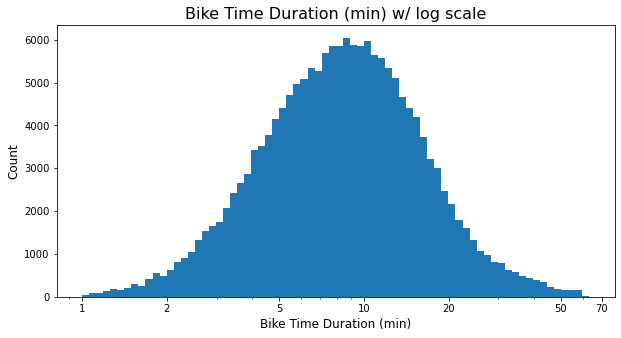

In [6]:
# plot bike time duration with a log scale
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max())+log_binsize, log_binsize)

plt.rcParams["figure.figsize"] = (10,5)
plt.hist(data = df, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 70], [1, 2, 5, 10, 20, 50, 70]);
plt.xlabel('Bike Time Duration (min)', size = 12);
plt.ylabel('Count', size = 12);
plt.title('Bike Time Duration (min) w/ log scale', size = 16);

## 2. Age of Bikers
#### Observations
>- Most of the bikers are younger than 40 years, data peak at 32 years
>- Outliers where member age >60 years were removed

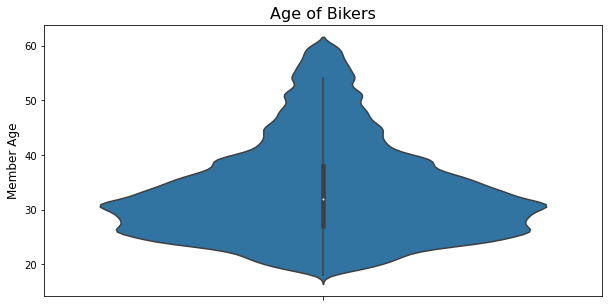

In [7]:
# violinplot member_age
sb.violinplot(data = df, y = 'member_age');
plt.rcParams["figure.figsize"] = (10,5)
plt.title('Age of Bikers', size = 16);
plt.ylabel('Member Age', size = 12);

## 3. Bike Ride Trends
#### 3.1. Observations Weekday
>- Thursday has the most male and female bikers compared to other days. It also has the most subscriber bikers compared to other days.
>- The weekend has the lowest frequency of bike rides in term of gender and user type compared to the rest of the week.

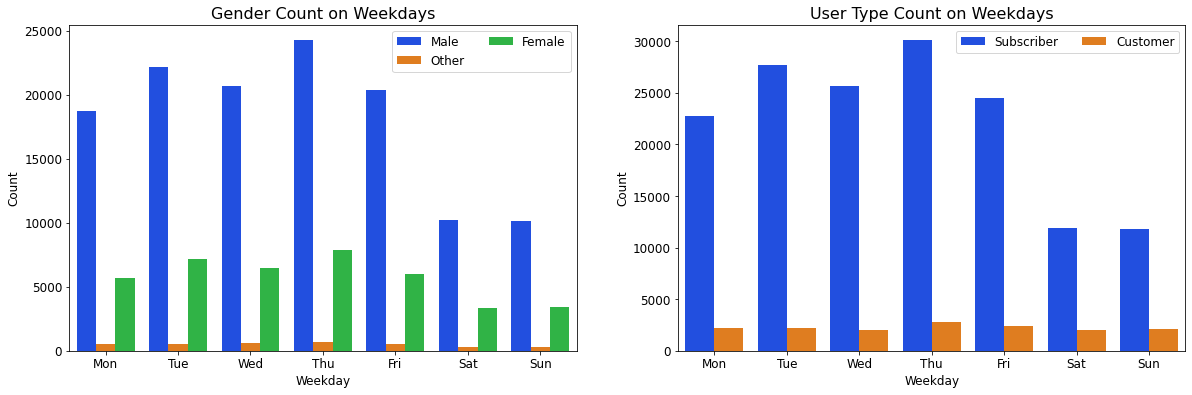

In [8]:
# countplot for member_gender & user_type and start_time_dayofweek
plt.figure(figsize = [20, 6]);
plt.rcParams.update({'font.size': 12})

ax = plt.subplot(1, 2, 1);
sb.countplot(data = df, x = 'start_time_dayofweek', hue = 'member_gender', palette = 'bright');
ax.legend(ncol = 2);
ax.set(xlabel = 'Weekday', ylabel = 'Count');
ax.set_title('Gender Count on Weekdays', fontsize = 16);

ax = plt.subplot(1, 2, 2);
sb.countplot(data = df, x = 'start_time_dayofweek', hue = 'user_type', palette = 'bright');
ax.legend(ncol = 2);
ax.set(xlabel = 'Weekday', ylabel = 'Count');
ax.set_title('User Type Count on Weekdays', fontsize = 16);

## 3. Bike Ride Trends
#### 3.2. Observations Time of Day
>- There are two starting spikes for bike trips over the day: Starts between 8:00 to 9:00 AM and starts between 17:00 to 18:00 PM.
>- Over the whole day, more male biker starts their trip than female riders.
>- Over the whole day, more Subscriber (Member) starts their bike rides than Customer bikers.
>- On Thursday the most bike trips are started.

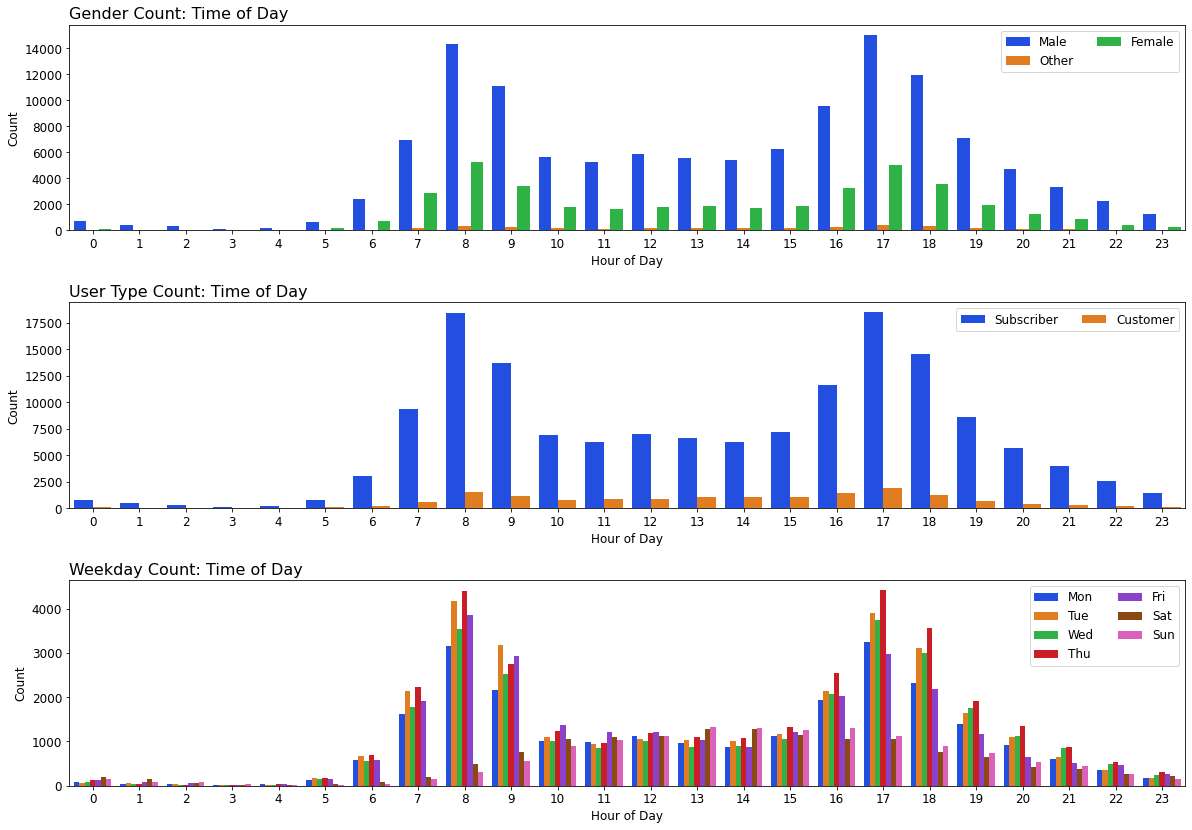

In [9]:
# countplot for member_gender & user_type & start_time_hourofday and start_time_hourofday
plt.figure(figsize = [20, 14]);
plt.rcParams.update({'font.size': 12});
plt.subplots_adjust(hspace=0.35)

ax = plt.subplot(3, 1, 1);
sb.countplot(data = df, x = 'start_time_hourofday', hue = 'member_gender', palette = 'bright');
ax.legend(ncol = 2);
ax.set(xlabel = 'Hour of Day', ylabel = 'Count');
ax.set_title('Gender Count: Time of Day', loc = 'left', fontsize = 16);

ax = plt.subplot(3, 1, 2);
sb.countplot(data = df, x = 'start_time_hourofday', hue = 'user_type', palette = 'bright');
ax.legend(ncol = 2);
ax.set(xlabel = 'Hour of Day', ylabel = 'Count');
ax.set_title('User Type Count: Time of Day', loc = 'left', fontsize = 16);

ax = plt.subplot(3, 1, 3);
sb.countplot(data = df, x = 'start_time_hourofday', hue = 'start_time_dayofweek', palette = 'bright');
ax.legend(ncol = 2);
ax.set(xlabel = 'Hour of Day', ylabel = 'Count');
ax.set_title('Weekday Count: Time of Day', loc = 'left', fontsize = 16);

## 3. Bike Ride Trends
#### 3.3. Observations hourly usage: Customer vs. Subscriber
>- Subscribers mainly use the bike share service in the morning and in the evening from Monday to Friday. I think these people are mainly commuters.
>- Customers have a similar usage like Subscribers, but they also use the service more on the weekend. These users could mainly be tourists.

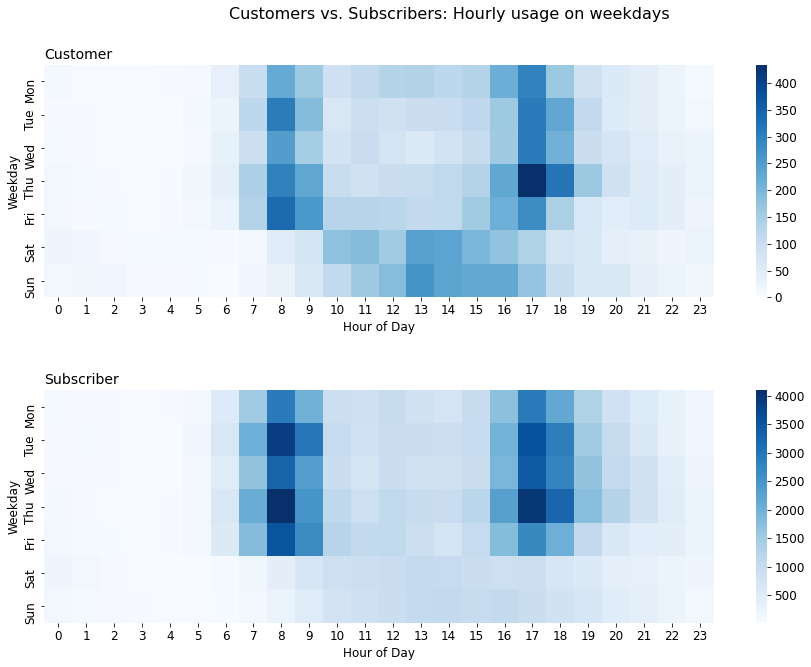

In [10]:
# plot heatmap Customers vs. Subscribers and their hourly usage during weekdays
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace = 0.4, top = 0.9)
plt.suptitle('Customers vs. Subscribers: Hourly usage on weekdays', fontsize = 16);

plt.subplot(2, 1, 1)
customers = df.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_time_dayofweek', 'start_time_hourofday']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'start_time_dayofweek', columns = 'start_time_hourofday', values = 'count')
sb.heatmap(ct_counts, cmap = "Blues");
plt.title('Customer', loc = 'left', fontsize = 14);
plt.xlabel('Hour of Day', fontsize = 12);
plt.ylabel('Weekday', fontsize = 12);

plt.subplot(2, 1, 2)
subscribers = df.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_time_dayofweek', 'start_time_hourofday']).size()
st_counts = st_counts.reset_index(name = 'count')
st_counts = st_counts.pivot(index = 'start_time_dayofweek', columns = 'start_time_hourofday', values = 'count')
sb.heatmap(st_counts, cmap = "Blues");
plt.title('Subscriber', loc = 'left', fontsize = 14);
plt.xlabel('Hour of Day', fontsize = 12);
plt.ylabel('Weekday', fontsize = 12);

## 3. Bike Ride Trends
#### 3.4. Observations hourly usage: Male vs. Female
>- Overall, there are more male than female bikers, but the usage shows a similar pattern.

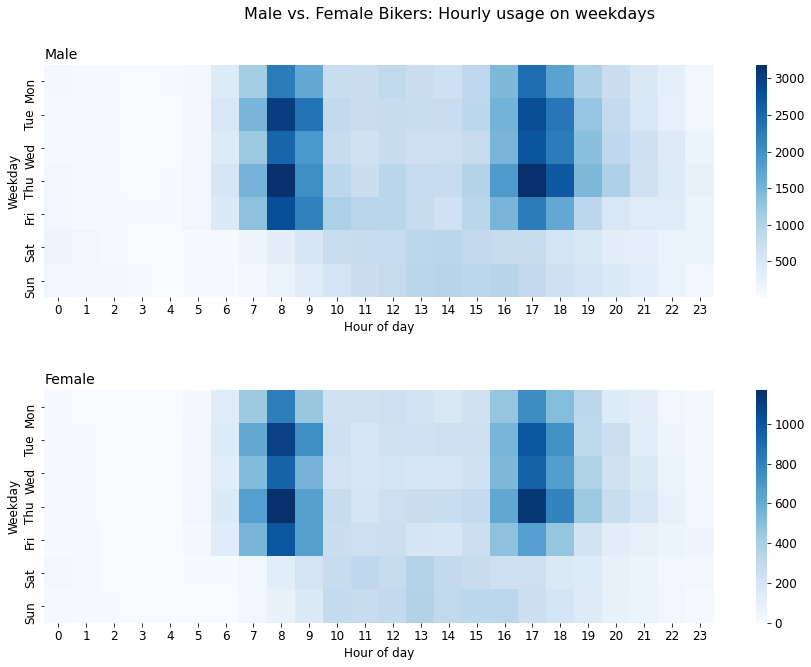

In [11]:
# plot heatmap Male vs. Female Riders and their hourly usage during weekdays
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace = 0.4, top = 0.9)
plt.suptitle('Male vs. Female Bikers: Hourly usage on weekdays', fontsize = 16);

plt.subplot(2, 1, 1)
male = df.query('member_gender == "Male"')
ct_counts = male.groupby(['start_time_dayofweek', 'start_time_hourofday']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'start_time_dayofweek', columns = 'start_time_hourofday', values = 'count')
sb.heatmap(ct_counts, cmap = "Blues");
plt.title('Male', loc = 'left', fontsize = 14);
plt.xlabel('Hour of day', fontsize = 12);
plt.ylabel('Weekday', fontsize = 12);

plt.subplot(2, 1, 2)
female = df.query('member_gender == "Female"')
st_counts = female.groupby(['start_time_dayofweek', 'start_time_hourofday']).size()
st_counts = st_counts.reset_index(name = 'count')
st_counts = st_counts.pivot(index = 'start_time_dayofweek', columns = 'start_time_hourofday', values = 'count')
sb.heatmap(st_counts, cmap = "Blues");
plt.title('Female', loc = 'left', fontsize = 14);
plt.xlabel('Hour of day', fontsize = 12);
plt.ylabel('Weekday', fontsize = 12);